# The IMDB dataset

This is a set of 50,000 highly polarized reviews from the Internet Movie Database. They’re split into 25,000 reviews for training and 25,000 reviews for testing, each set consisting of 50% negative and 50% positive reviews. 




## 1. Loading the IMDB dataset

In [1]:
from keras.datasets import imdb


Using TensorFlow backend.


In [2]:
(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words=10000)

16343040/17464789 [===========================>..] - ETA: 0s

The variables train_data and test_data are lists of reviews; each review is a list of word indices (encoding a sequence of words). train_labels and test_labels are lists of 0s and 1s, where 0 stands for negative and 1 stands for positive

## 2. Preparing the data

Lists of intefers can't be fed into a neural networks but they have to be transformed into tensors instead. There are two ways to do that:
1. Pad your lists so that they all have the same length, turn them into an integer tensor of shape (samples, word_indices) and then use as the first layer in your network a layer capable of handling such integer tensors (the Embedding layer)
2. One-hot encode your lists to turn them into vectors of 0s and 1s. Then you could use as the first layer in your network a Dense layer, capable of handling floating-point vector data.



In [4]:
import numpy as np

def vectorize_sequences(sequences, dimensions = 10000):
    results = np.zeros((len(sequences), dimensions))
    for i, sequence in enumerate(sequences):
        results[i,sequence]=1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [5]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## 3. Building your network

Input data: vectors
Labels: scalars
This is the easiest setup. A type of network that performs well on such a problem is a simple stack of fully connected (Dense) layers with relu activations.

There are 02 keys architecture decisions to be made about such a stack of Dense layers:
- How many layers to use
- How many hidden units to choose for each layer 


A relu (rectified linear unit) is a function meant to zero out negative values, whereas a sigmoid "squashes" arbitrary values into the [0,1] interval, outputting something that can be interpreted as a probability.

In [7]:
# Model definition 
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))


### What are activation functions and why are they neccessary?

Without an activation function like relu (non-linearity), the Dense layer would consist of 2 linear operations - a dot product and an addition so the layer could only learn linear transformations of the input data. Such a hypothesis space is too restricted and wouldn't benefit from multiple layers of represenations, because a deep stack of linear layers would still implement a linear operation: adding more layers wouldn't extend the hypothesis space. 

In order to get access to a much richer hypothesis space that would benefit from deep representations, you need a non-linearity, or acitvation function

In [8]:
# Compiling the model
model.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

Cross entropy is usually the best choice when you're dealing with models that output probabilities. Cross entropy is a quantity from the field of Information Theory that measures the distance between probability distributions or between the ground-truth distribution and your predictions. 

In [9]:
# Configure the optimizer
from keras import optimizers

model.compile(optimizer = optimizers.RMSprop(lr=0.001), loss = 'binary_crossentropy', metrics=['accuracy'])

In [10]:
# Using custom losses and metrics

from keras import losses
from keras import metrics

model.compile(optimizer = optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

## 4. Validating your approach

In [12]:
# Setting aside a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [14]:
# Training your model
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))
                    

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s - loss: 0.5113 - acc: 0.7841 - val_loss: 0.3873 - val_acc: 0.8618
Epoch 2/20
15000/15000 [==============================] - 1s - loss: 0.3068 - acc: 0.8988 - val_loss: 0.3212 - val_acc: 0.8774
Epoch 3/20
15000/15000 [==============================] - 1s - loss: 0.2244 - acc: 0.9284 - val_loss: 0.2983 - val_acc: 0.8815
Epoch 4/20
15000/15000 [==============================] - 1s - loss: 0.1805 - acc: 0.9428 - val_loss: 0.2731 - val_acc: 0.8931
Epoch 5/20
15000/15000 [==============================] - 1s - loss: 0.1422 - acc: 0.9563 - val_loss: 0.2934 - val_acc: 0.8834
Epoch 6/20
15000/15000 [==============================] - 1s - loss: 0.1188 - acc: 0.9631 - val_loss: 0.2989 - val_acc: 0.8867
Epoch 7/20
15000/15000 [==============================] - 1s - loss: 0.1006 - acc: 0.9687 - val_loss: 0.3068 - val_acc: 0.8842
Epoch 8/20
15000/15000 [==============================] - 1s 

In [17]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

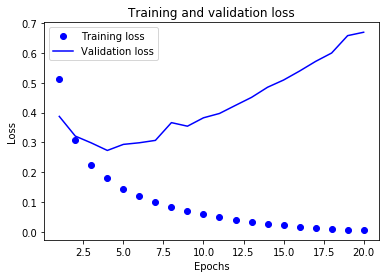

In [19]:
# Plotting the training and validation loss

import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']
epochs = range(1, len(acc)+1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

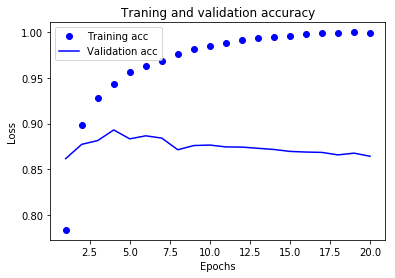

In [21]:
# Plotting the training and validation accuracy 
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation acc')
plt.title('Traning and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [24]:
# Retraining a model with 4 epochs

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics = ['accuracy'])

model.fit(x_train, y_train, epochs=4,batch_size=512)
results=model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 1s - loss: 0.4819 - acc: 0.7943     
Epoch 2/4
25000/25000 [==============================] - 1s - loss: 0.2587 - acc: 0.9094     
Epoch 3/4
25000/25000 [==============================] - 1s - loss: 0.1957 - acc: 0.9289     
Epoch 4/4
24512/25000 [============================>.] - ETA: 0s

In [25]:
# Using the trained network to generate predictions on new data
model.predict(x_test)

array([[  9.20451939e-01],
       [  8.99388671e-01],
       [  9.98762846e-01],
       ..., 
       [  3.08991194e-01],
       [  8.27200187e-04],
       [  8.14273179e-01]], dtype=float32)

## Wrapping up

- Preprocessing is necessary on raw data to be compatible for feeding - as tensors - into a neural network. Sequences of words can be encoded as binary vectors but there are other encoding options as well
- Stacks of Dense layers with relu activatiosn can solve a wide range of problems
- As they get better on their traininng data, neural networks eventually start overfitting and end up obtaining increasingly worse results on data they've never seen before. Be sure to always monitor performance on data that is outside of the training set. 